In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# numpy is used for efficient array (vector or matrix) operations
# pyplot is used for plotting 
# Must read: [https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm]


# Polynomial Class

class Polynomial:
  # Constructor, note that it starts and ends with two underscores
  def __init__(self, coeff):
    '''
    Every internal variable of the object must be saved and initialized
    in this method: self.variable = value

    Note that this is an example of block comment in python. A block comment 
    starts with three ' and ends with three '.
    '''
    self.coefficients = coeff 
    self.order = len(coeff) - 1

  # Constructor to make the object callable 
  def __call__(self, x):
    '''
    Here we assumed x is a numpy array. Remember that a numpy array acts like 
    a vector (1D matrix). So an operation x + 1 would add 1 to each element
    of the matrix (unlike python's defaule list). Simlarly, x ** 2 would return
    element wise square of the array. 

    Hence, this method would return an array, where the i'th element is the 
    (polynomial) interpolated value of x[i], given the coeffecients a[i].
    '''
    res = 0
    # remember 1: length = order + 1 for a polynomial
    # remember 2: range(0, a) is same as range(a)
    # remember 3: range(a, b) means a is inclusive, b is exclusive
    for i in range( self.order + 1 ):
      a_i = self.coefficients[i]
      res +=  a_i * (x ** i)
      
    return res

  # String representation method of the object (similar to toString() of java)
  def __repr__(self):
    # remember: a formatted string must start with f.
    # backslash (\) means a line break, so the next line would be joined with
    # the previous line
    ret_str = \
    f"{self.order}th order Polynomial with coefficients - {self.coefficients}"
    return ret_str

  # custom method 1: to get the degree of the polynomial
  def degree(self):
    return self.order
  # custom method 2: to get the coefficients of the polynomial
  def coeffs(self):
    return self.coefficients

In [ ]:
# an example to see if our implementation works
coeff = np.array([1, 0, 2, 4, -2])
p = Polynomial(coeff)
print(p)  # check if printable
x = np.array([0, 1, 2])
print(p(x)) # check if the object is callable


4th order Polynomial with coefficients - [ 1  0  2  4 -2]
[1 5 9]


In [ ]:
'''
Lab task 1
Here we implement a function which takes a discrete x and y array, and returns
a Polynomial object (the one we just implemented). This polynomial object can 
be used to calculate y for any other value of x (not in that list) within the
range
'''
def get_poly(x, y):
  length = len(x)
  # np.zeors( (a, b) ) returns a (a x b) matrix, i.e., a rows and b columns 
  X = np.zeros( (length, length) )

  # See the lecture video how the matrix is formed
  for i in range(length):
    for j in range(length):
      X[i, j] = x[i] ** j

  # We could have also used np.linalg.inv to find the inverse
  # but pinv is more efficient
  X_inv = np.linalg.pinv(X) #pseudo inverse
  a = np.dot(X_inv, y)
  p = Polynomial(a)

  return p

In [ ]:
x = np.array([-3., -2., -1., 0., 1., 3.])
y = np.array([-80., -13., 6., 1., 5., 16.])
p = get_poly(x, y)
'''
np.linspace(a, b, n) returns a numpy array of n points equally 
spaced from a to b
'''
new_x = np.linspace(-3, 3, 100)
# interpolated values
poly_y = p(new_x)



Text(0, 0.5, 'y - axis')

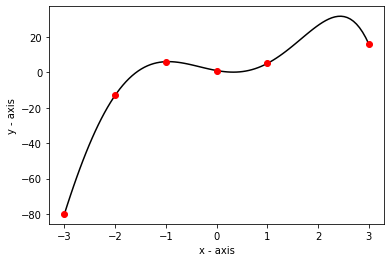

In [ ]:
plt.plot(new_x, poly_y, 'k')
plt.plot(x, y, 'ro')
plt.xlabel('x - axis')
plt.ylabel('y - axis')

# **The blocks below were used for debugging/demonstration purpose**

In [ ]:
# Python: How to function
# Note: No need to specify return type, can have multiple outputs
def fun1(x, y):
  z = x + y
  z2 = z**2
  return z, z2

In [ ]:
a, b = fun1(1, 2)
print(a)
print(b)

3
9


In [ ]:
# usage of line breal
a = \
3

print(a)

3


In [ ]:
# demo: loop
for i in range(1, 5):
  print(i)

1
2
3
4


In [ ]:
# demo: np.zeors
X = np.zeros( (2, 3) )
print(X)

[[0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
# demo: array accessing, element wise operation
X[0, 0] = 1
X[1, 2] = 3
print(X * X)

[[1. 0. 0.]
 [0. 0. 9.]]


In [ ]:
x = np.array([1.0, 2.0, 3.0])

In [ ]:
# demo: array slicing
X = np.zeros((3, 4))
X[0, 0] = 1
X[1, 2] = 3
print(X)
print(X[0]) # prints the 0th row
print(X[:, 0]) # prints the 0th column

[[1. 0. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 0.]]
[1. 0. 0. 0.]
[1. 0. 0.]
